In [1]:
from RAFS import RAFS
import nibabel as nib

target = nib.load('/home/kdh/code/BME_Capstone1/NFBS_Dataset/A00032875/sub-A00032875_ses-NFB3_T1w.nii.gz').get_fdata()
target.shape

import matplotlib.pyplot as plt
sl = target[:, 128, :]
#plt.imshow(sl)

model = RAFS(faiss_index='BME_faiss.index',
             faiss_json='faiss_idx.json',)

Using cache found in /home/kdh/.cache/torch/hub/facebookresearch_dinov2_main
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/home/kdh/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")


In [2]:
import torch
sl = torch.Tensor(sl)
sl.shape

torch.Size([256, 192])

In [3]:
re = model._retrieve_image(sl)

In [4]:
mb = model._get_memory_bank(re)

In [9]:
mb['vision_features'].shape

torch.Size([3, 64, 16, 12])

In [5]:
import numpy as np
sltmp = np.stack([target[:, 128, :]]*3, axis=0)
sltmp = torch.Tensor(sltmp).cuda()
sltmp.shape

torch.Size([3, 256, 192])

In [6]:
mb.keys()

dict_keys(['vision_features', 'vision_pos_enc'])

In [7]:
model._apply_memory_attention(sltmp.unsqueeze(0), mb)

AssertionError: Batch size must be the same for curr and memory

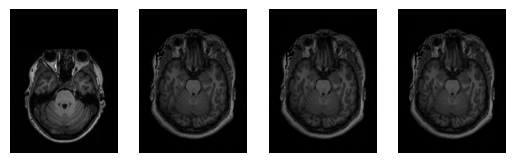

In [13]:
plt.subplot(1, 4, 1)
plt.imshow(sl, cmap='gray')
plt.axis('off')
for i in range(2, 5):
    plt.subplot(1, 4, i)
    plt.imshow(re['image'][0].cpu().permute(1,2,0))
    plt.axis('off')